# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0382 Чегодаева Елизавета и Сергеев Дмитрий. Вариант №14

## Цель работы

$\quad$Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

* Задача *численного интегрирования* состоит в замене исходной подынтегральной функции некоторой аппроксимирующей функцией.

* *Формула трапеций*: $$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$$

* *Формула прямоугольников*:  $$y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0$$

* *Формула Симпсона*: $$y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$$

* *Формула "по правилу 3/8"*: $$y_{n+2}=y_{n-1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1}), y_0 = 0$$



## Постановка задачи

$\quad$Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

---

1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

2. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:
$$y_{n+2}=y_{n-1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1}),$$
Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

3. Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

4. Сделать выводы.

## Выполнение работы




In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

**1.**  
$\quad$Вывод формул передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона:

$\quad$Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$  

*   Формула прямоугольников:  

 $y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0$   $=>$  
 $\quad$$y_{n+1} = H(\omega)e^{i \omega (n + 1)}$ -- точное значение;  
 $\quad$$y_{n+1} = H(\omega)e^{i \omega n} + e^{i \omega (n + 0.5)}$ -- вычисленное значение.

 Приравняем правые части точного и вычисленного значений:
 $H(\omega)e^{i \omega (n + 1)} = H(\omega)e^{i \omega n} + e^{i \omega (n + 0.5)}$

 $H(\omega)(e^{i \omega n}*e^{i \omega}) = H(\omega)e^{i \omega n} + e^{i \omega n}*e^{0.5 i \omega }$

 $H(\omega)(e^{i \omega n}*e^{i \omega}) - H(\omega)e^{i \omega n} = e^{i \omega n}*e^{0.5 i \omega }$ $\quad$ $(:e^{i \omega n})$

 $H(\omega)e^{i \omega} - H(\omega) = e^{0.5 i \omega }$

 $H(\omega)(e^{i \omega} -1) = e^{0.5 i \omega }$

 $H(\omega) = \frac{e^{0.5 i \omega }}{e^{i \omega} -1}$

 $H(\omega) = \frac {1} {e^{\frac 1 2 i \omega} - e^{- \frac 1 2 i \omega}} = \frac 1 {2i \sin {\frac \omega 2}}$  

  $\omega = 2πf$  $=>$  $\tilde H(f) = \frac 1 {2i \sin {\pi f}}$

 Точное значение интеграла от $e^{i \omega t}$ равно $\frac {e^{i \omega t}} {i \omega}$:

  $\gamma = \frac {\text {Вычисленное}}{\text {Точное}} = \frac {i\omega}{2i \sin {\frac \omega 2}} = \frac {\frac \omega 2}{\sin {\frac \omega 2}} = 1 + \frac {\omega^2}{24} + \frac {7 \omega^4}{5760} + ...$  

  $\tilde \gamma = \frac {\text {Вычисленное}}{\text {Точное}} = \frac {\pi f}{\sin {\pi f}} = 1 + \frac {\pi^2 f^2}{6} + \frac {7 \pi^4 f^4}{360} + ...$  

---

*   Формула трапеций:   
  $y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$  $=>$

  $\quad$ $y_{n+1} = H(\omega)e^{i \omega (n + 1)}$  -- точное значение;   
  $\quad$ $y_{n+1} = H(\omega)e^{i \omega n} + \frac 1 2 (e^{i \omega n} + e^{i \omega (n + 1)})$  -- вычисленное значение.

  Приравняем правые части:
  $H(\omega)e^{i \omega (n + 1)} = H(\omega)e^{i \omega n} + \frac 1 2 (e^{i \omega n} + e^{i \omega (n + 1)})$  

  $H(\omega)(e^{i \omega n}* e^{i \omega}) = H(\omega)e^{i \omega n} + \frac 1 2 (e^{i \omega n} + e^{i \omega n}*e^{i \omega})$  

  $H(\omega)(e^{i \omega n}* e^{i \omega}) - H(\omega)e^{i \omega n} = \frac 1 2 (e^{i \omega n} + e^{i \omega n}*e^{i \omega})$ $\quad$ $(:e^{i \omega n})$

  $H(\omega)e^{i \omega} - H(\omega) = \frac 1 2 (1 + e^{i \omega})$

  $H(\omega)(e^{i \omega} - 1 ) =\frac 1 2 (1 + e^{i \omega})$

  $H(\omega)=\frac{\frac 1 2 (1 + e^{i \omega})}{(e^{i \omega} - 1 )}$

   $H(\omega) = \frac {\cos {\frac \omega 2}}{2i \sin {\frac \omega 2}}$

  $\omega = 2πf$  $=>$  $\tilde H(f) = \frac {\cos {\pi f}} {2i \sin {\pi f}}$  

  Точное значение интеграла от $e^{i \omega t}$ равно $\frac {e^{i \omega t}} {i \omega}$:  
  
  $\gamma = \frac {\text {Вычисленное}}{\text {Точное}} = \cos (\frac \omega 2) \frac {i\omega}{2i \sin (\frac \omega 2)} = \cos (\frac \omega 2) \frac {\frac \omega 2}{\sin (\frac \omega 2)} = 1 - \frac {\omega^2}{12} + \frac {\omega^4}{720} + ...$

  $\tilde \gamma = \frac {\text {Вычисленное}}{\text {Точное}} =  \cos (\pi f) \frac {\pi f}{\sin (\pi f)} = 1 - \frac {\pi^2 f^2}{3} + \frac {\pi^4 f^4}{45} + ...$

---

*   Формула Симпсона:  
  $y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$  $=>$  

  $\quad$ $y_{n+1} = H(\omega)e^{i \omega (n + 1)}$  -- точное значение;   
  $\quad$ $y_{n+1} = H(\omega)e^{i \omega (n-1)} + \frac 1 3 (e^{i \omega (n-1)} + 4e^{i \omega n} + e^{i \omega (n + 1)})$  -- вычисленное значение.

  Приравняем правые части:
  $H(\omega)e^{i \omega (n + 1)} = H(\omega)e^{i \omega (n-1)} + \frac 1 3 (e^{i \omega (n-1)} + 4e^{i \omega n} + e^{i \omega (n + 1)})$

  $H(\omega)(e^{i \omega n}*e^{i \omega}) = H(\omega)(e^{i \omega n}*e^{-i \omega}) + \frac 1 3 (e^{i \omega n} * e^{-i \omega} + 4e^{i \omega n} + e^{i \omega n}*e^{i \omega})$

  $H(\omega)(e^{i \omega n}*e^{i \omega}) - H(\omega)(e^{i \omega n}*e^{-i \omega}) = \frac 1 3 (e^{i \omega n} * e^{-i \omega} + 4e^{i \omega n} + e^{i \omega n}*e^{i \omega})$ $\quad$ $(:e^{i \omega n})$

  $H(\omega)e^{i \omega} - H(\omega)e^{-i \omega} = \frac 1 3 (e^{-i \omega} + 4 + e^{i \omega})$

  $H(\omega)(e^{i \omega} - e^{-i \omega}) = \frac 1 3 (e^{-i \omega} + 4 + e^{i \omega})$

  $H(\omega) = \frac {\frac 1 3 (e^{-i \omega} + 4 + e^{i \omega})}{(e^{i \omega} - e^{-i \omega})}$

  $H(\omega) = \frac {\cos {\omega} + 2}{3i \sin {\omega}}$

  $\omega = 2πf$  $=>$  $\tilde H(f) = \frac {\cos {2\pi f} + 2} {3i \sin {2 \pi f}}$  

  Точное значение интеграла от $e^{i \omega t}$ равно $\frac {e^{i \omega t}} {i \omega}$:  

  $\gamma = \frac {\text {Вычисленное}}{\text {Точное}} =  \frac {(\cos {\omega} + 2) i\omega}{3i \sin {\omega}} = \frac {\cos {\omega} + 2} {3} * \frac {\omega}{\sin {\omega}} = 1 + \frac {\omega^4}{180} + ...$  

  $\tilde \gamma = \frac {\text {Вычисленное}}{\text {Точное}} = \frac {\cos (2 \pi f) + 2} {3} * \frac {2 \pi f}{\sin (2 \pi f)} = 1 + \frac {4 \pi^4 f^4}{45} + ...$


In [4]:
#Формула прямоугольников
def tildaH_1(f):
    H = (1 / (2j*np.sin(math.pi*f))).imag
    return H

def tilda_gamma_1(f):
    gamma = (math.pi*f) / (np.sin(math.pi*f))
    return gamma

#Формула трапеций
def tildaH_2(f):
    H = (np.cos(math.pi*f) / (2j*np.sin(math.pi*f))).imag
    return H

def tilda_gamma_2(f):
    gamma = (np.cos(math.pi*f))*((math.pi*f) / (np.sin(math.pi*f)))
    return gamma

#Формула Симпсона
def tildaH_3(f):
    H = ((np.cos(2*math.pi*f)+2) / (3j*np.sin(2*math.pi*f))).imag
    return H

def tilda_gamma_3(f):
    gamma = ((np.cos(2*math.pi*f)+2)/3) * ((2*math.pi*f)/(np.sin(2*math.pi*f)))
    return gamma

$\quad$Далее построены графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному:

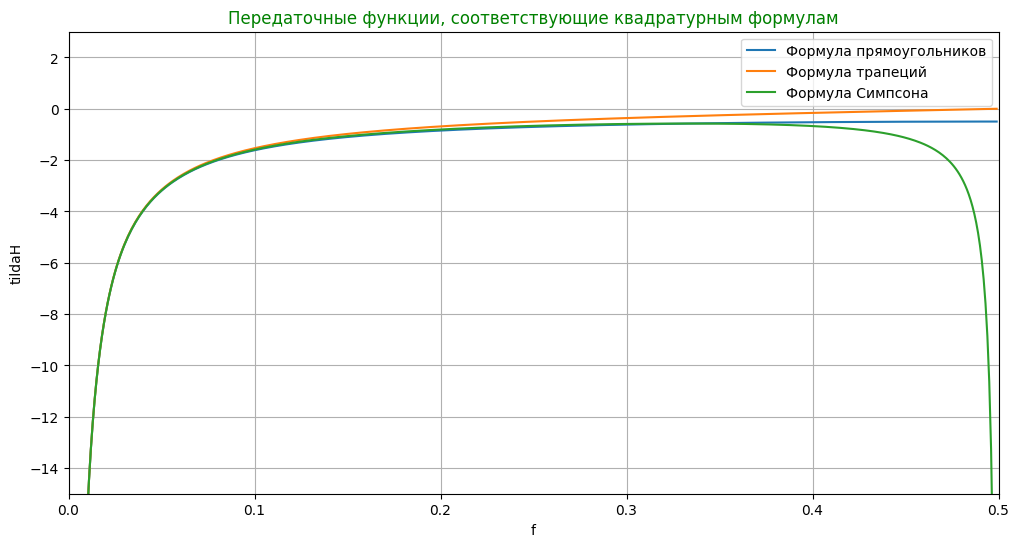

In [5]:
interval = np.arange(0.001, 0.5, 0.001)

plt.figure(figsize=(12, 6))

plt.title('Передаточные функции, соответствующие квадратурным формулам', color="Green")
plt.plot(interval, tildaH_1(interval), label='Формула прямоугольников')
plt.plot(interval, tildaH_2(interval), label='Формула трапеций')
plt.plot(interval, tildaH_3(interval), label='Формула Симпсона')
plt.axis((0, 0.5, -15, 3))
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

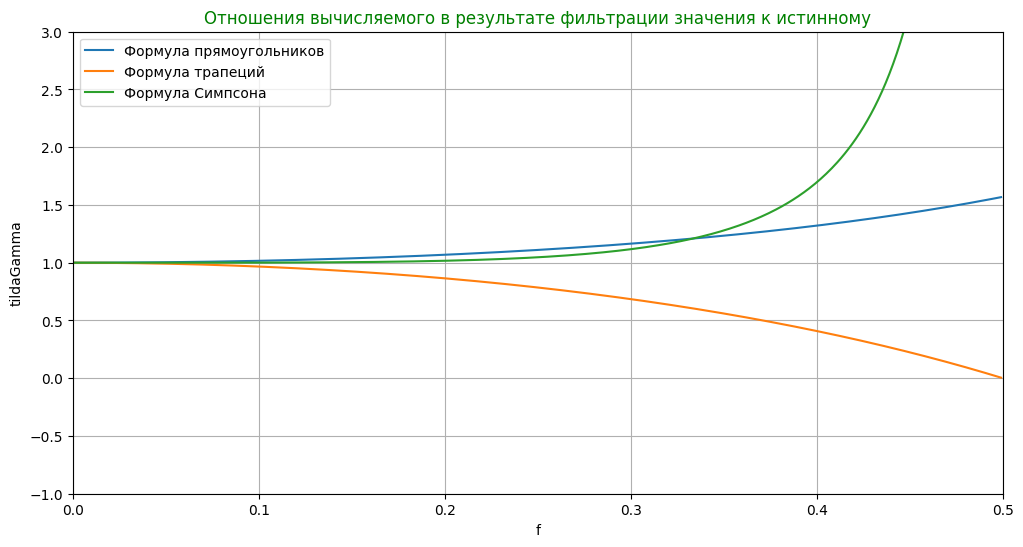

In [6]:
plt.figure(figsize=(12, 6))

plt.title('Отношения вычисляемого в результате фильтрации значения к истинному', color="Green")
plt.plot(interval, tilda_gamma_1(interval), label='Формула прямоугольников')
plt.plot(interval, tilda_gamma_2(interval), label='Формула трапеций')
plt.plot(interval, tilda_gamma_3(interval), label='Формула Симпсона')
plt.axis((0, 0.5, -1, 3))
plt.xlabel('f')
plt.ylabel('tildaGamma')
plt.grid(True)

plt.legend()
plt.show()

$\quad$ Интерпритация частотных свойств полученных передаточных функций:

* Если подинтегрельная функция изменчива (её частотый спектр содержит много высоких частот), то при использовании формулы Симпсона и прямоугольников в выходном значении высокие частоты больше влияют на результат (при использовании формулы Симпсона данная закономерность проявляется сильнее, чем при использовании формулы прямоугольников);

* При использовании формулы трапеций -- в выходном сигнале высокие частоты подавляются.

* На графике передаточных функций видно, что до точки $f≈0.2$ функции ведут себя одинаково (плавно уменьшается подавление высоких частот), далее -- функции, основанные на формулах прямоугольников и трапеций, сохраняют тенденцию, а функция по формуле Симпсона - демонстрирует увеличение подавления высоких частот.



**2.**

$\quad$Вывод формулы передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:
$$y_{n+2}=y_{n-1}+\frac{1}{8}(s_{n+2}+3s_{n+1}+3s_n+s_{n-1})$$

Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}, y_0 = 0$ $=>$  

$\quad$ $y_{n+2} = H(\omega)e^{i \omega (n + 2)}$ -- точное значение;  
$\quad$ $y_{n+2} = H(\omega)e^{i \omega (n-1)} + \frac 1 8 (e^{i \omega (n+2)} + 3e^{i \omega (n+1)} + 3e^{i \omega n} + e^{i \omega (n - 1)})$ -- вычисленное значение.

Приравняем правые части точного и вычисленного значений:  
$H(\omega)e^{i \omega (n + 2)} = H(\omega)e^{i \omega (n-1)} + \frac 1 8 (e^{i \omega (n+2)} + 3e^{i \omega (n+1)} + 3e^{i \omega n} + e^{i \omega (n - 1)})$

$H(\omega)(e^{i \omega n}*e^{2 i \omega}) = H(\omega)(e^{i \omega n}*e^{-i \omega})  + \frac 1 8 (e^{i \omega n}*e^{2 i \omega } + 3e^{i \omega n}* e^{ i \omega} + 3e^{i \omega n} + e^{i \omega n} * e^{-i \omega})$

$H(\omega)(e^{i \omega n}*e^{2 i \omega}) - H(\omega)(e^{i \omega n}*e^{-i \omega}) = \frac 1 8 (e^{i \omega n}*e^{2 i \omega } + 3e^{i \omega n}* e^{ i \omega} + 3e^{i \omega n} + e^{i \omega n} * e^{-i \omega})$ $\quad$ $(:e^{i \omega n})$

$H(\omega)e^{2 i \omega} - H(\omega)e^{-i \omega} = \frac 1 8 (e^{2 i \omega } + 3e^{ i \omega} + 3 + e^{-i \omega})$

$H(\omega)(e^{2 i \omega} - e^{-i \omega}) = \frac 1 8 (e^{2 i \omega } + 3e^{ i \omega} + 3 + e^{-i \omega})$

$H(\omega) = \frac{\frac 1 8 (e^{2 i \omega } + 3e^{ i \omega} + 3 + e^{-i \omega})}{e^{2 i \omega} - e^{-i \omega}} = \frac {e^{2i \omega} + 3e^{i \omega} + 3 + e^{- i \omega}}{8 (e^{2 i \omega} - e^{- i \omega})}$

$H(\omega) = \frac {e^{2i \omega} + 3e^{i \omega} + 3 + e^{- i \omega}}{8 (e^{2 i \omega} - e^{- i \omega})} * \frac {e^{- \frac {i\omega}{2}}}{e^{- \frac {i\omega}{2}}} = \frac {e^{\frac {3i\omega}{2}} + 3e^{\frac {i\omega}{2}} + 3e^{- \frac {i\omega}{2}} + e^{- \frac {3i\omega}{2}}}{8 (e^{\frac {3i\omega}{2}} -\ e^{- \frac {3i\omega}{2}})} = \frac {2 \cos {(\frac {3\omega} 2)} + 6 \cos{(\frac \omega 2)}}{16 i \sin (\frac {3\omega} 2)}= \frac {\cos {(\frac {3\omega} 2)} + 3 \cos{(\frac \omega 2)}}{8 i \sin (\frac {3\omega} 2)}$

$\omega = 2πf$  $=>$  $\tilde H(f) = \frac {\cos {(3 \pi f)} + 3 \cos{(\pi f)}}{8 i \sin (3 \pi f)}$

Точное значение интеграла от $e^{i \omega t}$ равно $\frac {e^{i \omega t}} {i \omega}$:

$\gamma = \frac {\text {Вычисленное}}{\text {Точное}} = \frac {(\cos {(\frac {3\omega} 2)} + 3 \cos{(\frac \omega 2)})} {12}  * \frac {\frac {3\omega}{2}}{\sin (\frac {3\omega}{2})} = \frac 1 3 + \frac {\omega^4}{240} + ...$  

$\tilde \gamma = \frac {\text {Вычисленное}}{\text {Точное}} = \frac {(\cos {(3 \pi f)} + 3 \cos{(\pi f)})} {12}  * \frac {3 \pi f}{\sin (3 \pi f)} = \frac 1 3 + \frac {\pi^4 f^4}{15} + ...$

In [7]:
def tildaH_4(f):
    H = ((np.cos(3*math.pi*f) + 3*np.cos(math.pi*f)) / (8j*np.sin(3*math.pi*f))).imag
    return H

def tilda_gamma_4(f):
    gamma = 1/12*(np.cos(3*math.pi*f) + 3*np.cos(math.pi*f)) * (3*math.pi*f) / (np.sin(3*math.pi*f))
    return gamma

$\quad$График передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному:

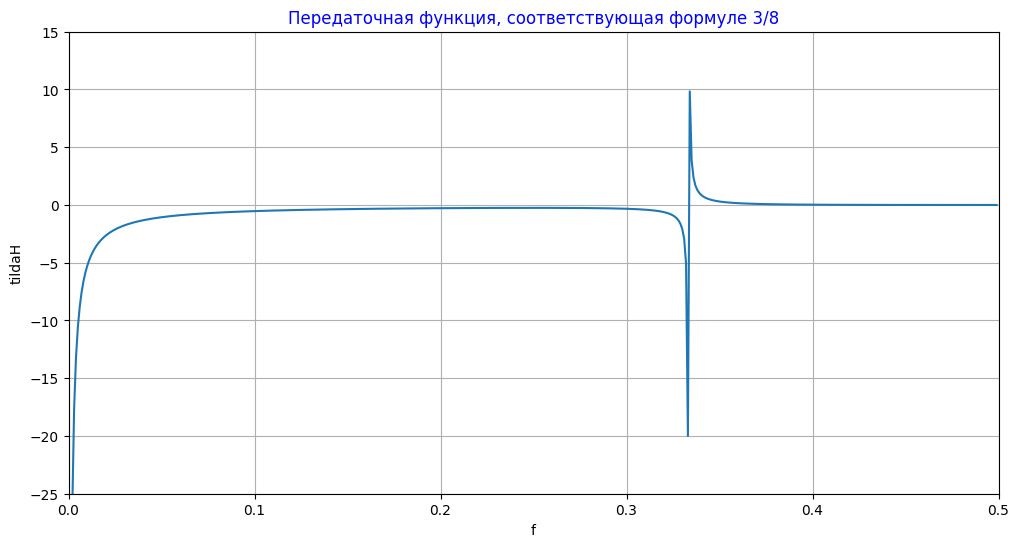

In [8]:
plt.figure(figsize=(12, 6))

plt.title('Передаточная функция, соответствующая формуле 3/8', color="blue")
plt.plot(interval, tildaH_4(interval))
plt.axis((0, 0.5, -25, 15))
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.show()

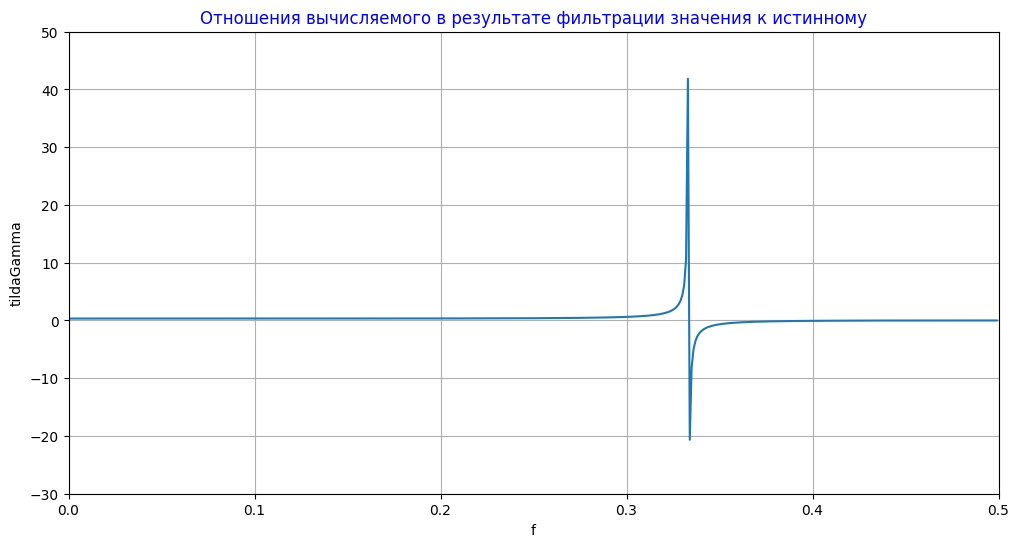

In [10]:
plt.figure(figsize=(12, 6))

plt.title('Отношения вычисляемого в результате фильтрации значения к истинному', color="Blue")
plt.plot(interval, tilda_gamma_4(interval))
plt.axis((0, 0.5, -30, 50))
plt.xlabel('f')
plt.ylabel('tildaGamma')
plt.grid(True)

plt.show()

$\quad$Частотные свойства передаточной функции:

* На интервале $[0,0.2]$ наблюдается подавление гармоник с высокой частотой, затем начиная с $f≈0.2$ и примерно до $f≈0.33$ происходит резкое увеличение влияния высоких частот в выходном сигнале, в точке $f≈0.33$ происходит стремительный спад влияния гармоник высокой частоты, далее -- степень подавления уменьшается (график растёт вверх) до определённого уровня.

**3.**

$\quad$Cопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2:

* На графиках функций, полученных в п.1 видно, что функции - гладкие, в отличии от функии п.2;  
* Передаточные функции, полученные с помощью формул Симпсона и прямоугольников демонстрируют усиление влияния высоких частот на выходной результат, а передаточные функции, полученные на основе формул "3/8" и трапеций, в свою очередь, показывают подавление гармоник с высокой частотой.


## Выводы

$\quad$В ходе выполнения практической работы был проведён анализ частотных характеристик известных формул численного интегрирования.

$\quad$Были выведены формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций, Симпсона и "по правилу 3/8". Построены графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному для каждой рассмотренной формулы. Также проинтерпритированы свойства, полученных передаточных функций и проведён их сравнительный анализ.

